# PyGfx points and lines example

**Note that this example depends on pygfx (`pip install -U pygfx`).**

An example demonstrating points and lines, in two separate canvases.

In [1]:
import numpy as np
import pygfx as gfx
from wgpu.gui.auto import WgpuCanvas

RFBOutputContext()


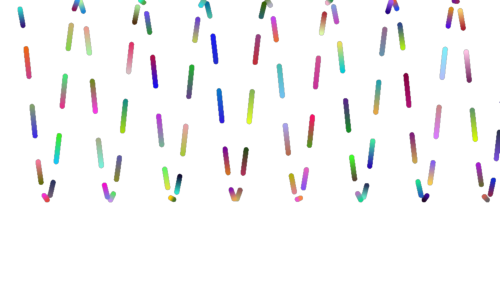

JupyterWgpuCanvas()

In [2]:
canvas1 = WgpuCanvas()
renderer1 = gfx.WgpuRenderer(canvas1)

scene1 = gfx.Scene()

x = np.linspace(20, 620, 200, dtype=np.float32)
y = np.sin(x / 10) * 100 + 200

positions = np.column_stack([x, y, np.zeros_like(x)])
colors = np.random.uniform(0, 1, (x.size, 4)).astype(np.float32)
colors[:,3] = 1  # all opaque

line = gfx.Line(
    gfx.Geometry(positions=positions, colors=colors),
    gfx.LineSegmentMaterial(thickness=6.0, color=(0.0, 0.7, 0.3, 0.5), vertex_colors=True)
)
scene1.add(line)

camera1 = gfx.ScreenCoordsCamera()

canvas1.request_draw(lambda: renderer1.render(scene1, camera1))
canvas1

RFBOutputContext()


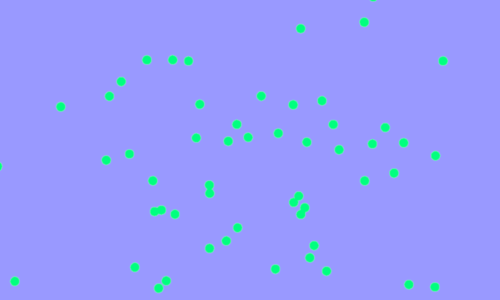

JupyterWgpuCanvas()

In [3]:
canvas2 = WgpuCanvas()
renderer2 = gfx.WgpuRenderer(canvas2)

scene2 = gfx.Scene()

positions = np.random.normal(0, 0.5, (100, 3)).astype(np.float32)

points = gfx.Points(
    gfx.Geometry(positions=positions),
    gfx.PointsMaterial(size=10, color=(0, 1, 0.5, 1.0))
)
scene2.add(points)
scene2.add(gfx.Background(None, gfx.BackgroundMaterial("#9999FF")))

camera2 = gfx.NDCCamera()

canvas2.request_draw(lambda: renderer2.render(scene2, camera2))
canvas2